In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns
import pandas as pd

from scipy import stats

import sys

import utils.trace_metric as trace_metric

In [3]:
with open('test_configs/results/trace_length_dict.pkl', 'rb') as f:
    trace_length_dict = pkl.load(f)

In [4]:
trace_length_dict.keys()

dict_keys(['wupwise-ref-wupwise-d-l64-p4096-w100000i.analyzed-1', 'xalan-default-J9-d-l64-p4096-w100000i.analyzed-1', 'fop-small-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'xalan-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1', 'mcf-ref-mcf-d-l64-p4096-w100000i.analyzed-1', 'xalan-default-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'luindex-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1', 'lucas-ref-lucas-d-l64-p4096-w100000i.analyzed-1', 'equake-ref-equake-d-l64-p4096-w100000i.analyzed-1', 'jython-default-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'fop-default-J9-d-l64-p4096-w100000i.analyzed-1', 'pmd-small-2-JikesRVM-d-l64-p4096-w100000i.analyzed-1', 'apsi-ref-apsi-d-l64-p4096-w100000i.analyzed-1', 'eclipse-default-JikesRVM-d-l64-p4096-w100000i.analyzed-1', 'lusearch-small-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'eclipse-small-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'lusearch-default-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'fop-small-J9-d-l64-p4096-w100000i.analyzed-1', 'avrora-sma

In [5]:
with open('test_configs/results/result_5816351.pkl', 'rb') as f:
    result = pkl.load(f)

In [6]:
result.keys()

dict_keys(['luindex-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'luindex-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl', 'luindex-default-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl', 'luindex-default-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'luindex-default-J9-d-l64-p4096-w100000i.analyzed-1.pkl', 'xalan-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'xalan-small-J9-d-l64-p4096-w100000i.analyzed-1.pkl', 'xalan-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl', 'xalan-default-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'xalan-default-J9-d-l64-p4096-w100000i.analyzed-1.pkl', 'xalan-default-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl', 'lusearch-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'lusearch-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl', 'lusearch-small-J9-d-l64-p4096-w100000i.analyzed-1.pkl', 'lusearch-default-J9-d-l64-p4096-w100000i.analyzed-1.pkl', 'lusearch-default-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'lusearch-default-HotSp

In [7]:
seeds = [1, 3, 6, 9]
trace_list = list(result.keys())

In [8]:
programs = [ '-'.join(val.split('-')[:2]) for val in trace_list ]

## JVM overall analysis

- programs are taken and the performance with respect to different JVMs are compared.

In [9]:
exp_dict = {}

for program in programs:
    program_list = [ val for val in trace_list if program in val ]
    
    exp_dict[program] = {
        "H9J": 0,
        "J9H": 0,
        "9HJ": 0,
        "JH9": 0,
        "HJ9": 0,
        "9JH": 0,
    }
    
    if len(program_list) < 3:
        continue
    
#     print(program_list)
    
    jikes = program+"-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl"
    j9 = program+"-J9-d-l64-p4096-w100000i.analyzed-1.pkl"
    hotspot = program+"-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl"        
    
#     test_list = result[jikes].keys()
    
    train_list = [ key for key in list(result.keys()) if jikes in list(result[key].keys()) ]
    
    for trace_train in train_list:
        for seed in seeds:
#             print(trace_test)
            # jikes
            if jikes != trace_train:
                jikes_ll = result[trace_train][jikes][seed]['avg_trace_loglikelihood']
            if j9 != trace_train:
                j9_ll = result[trace_train][j9][seed]['avg_trace_loglikelihood']
            if hotspot != trace_train:
                hotspot_ll = result[trace_train][hotspot][seed]['avg_trace_loglikelihood']
            
            if hotspot_ll > j9_ll and j9_ll > jikes_ll:
                exp_dict[program]["H9J"] += 1
            elif jikes_ll > j9_ll and j9_ll > hotspot_ll:
                exp_dict[program]["J9H"] += 1
            elif j9_ll > hotspot_ll and hotspot_ll > jikes_ll:
                exp_dict[program]["9HJ"] += 1
            elif jikes_ll > hotspot_ll and hotspot_ll > j9_ll:
                exp_dict[program]["JH9"] += 1
            elif hotspot_ll > jikes_ll and jikes_ll > j9_ll:
                exp_dict[program]["HJ9"] += 1
            elif j9_ll > jikes_ll and jikes_ll > hotspot_ll:
                exp_dict[program]["9JH"] += 1

In [10]:
df = pd.DataFrame(exp_dict)

In [11]:
df

luindex-small  luindex-default  xalan-small  xalan-default  \
9HJ              0               51            0              1   
9JH              0               38            0             14   
H9J              0                1            1             10   
HJ9              0                0            2              1   
J9H              0                2           72             56   
JH9              0                0           17             10   

     lusearch-small  lusearch-default  sunflow-small  sunflow-default  
9HJ              27                21             31               38  
9JH              26                69             14               36  
H9J               6                 1             22               10  
HJ9               6                 0              9                0  
J9H               7                 1              4                7  
JH9              20                 0             12                1

## JVM trace points analysis

- Performance on traces of different virtual machines at different points in a given trace is analyzed.
- This tells us about how different JVMs differ in their predictabiility at different points in trace time.

In [12]:
exp_dict = {}
jikes_data = []
j9_data = []
hotspot_data = []

for program in programs:
    program_list = [ val for val in trace_list if program in val ]
    
    exp_dict[program] = {
        "H9J": 0,
        "J9H": 0,
        "9HJ": 0,
        "JH9": 0,
        "HJ9": 0,
        "9JH": 0,
    }
    
    if len(program_list) < 3:
        continue
    
#     print(program_list)
    
    jikes = program+"-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl"
    j9 = program+"-J9-d-l64-p4096-w100000i.analyzed-1.pkl"
    hotspot = program+"-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl"        
    
    train_list = [ key for key in list(result.keys()) if jikes in list(result[key].keys()) ]
    
    for trace_train in train_list:
        for seed in seeds:
            trace_percent = 1.0
            
            # jikes
            key_list = result[trace_train][jikes][seed].keys()
            
            ll_list = []
            
            for key in key_list:
#                 print(trace_length_dict['.'.join(trace_test.split('.')[:2])][0])
                if  not isinstance(key, str):
                    if key < trace_percent * trace_length_dict['.'.join(trace_train.split('.')[:2])][0]:
                        ll_list.append(result[trace_train][jikes][seed][key]['average_loglikelihood'])
                        
                        jikes_data.append((key, ll_list[-1]))
                        
            
            jikes_ll = np.average(ll_list)
            
            # j9
            key_list = result[trace_train][j9][seed].keys()
            
            ll_list = []
            
            for key in key_list:
                if not isinstance(key, str):
                    if key < trace_percent * trace_length_dict['.'.join(trace_train.split('.')[:2])][0]:
                        ll_list.append(result[trace_train][j9][seed][key]['average_loglikelihood'])
                        
                        j9_data.append((key, ll_list[-1]))
            
            j9_ll = np.average(ll_list)
            
            # hotspot
            key_list = result[trace_train][hotspot][seed].keys()
            
            ll_list = []
            
            for key in key_list:
                if  not isinstance(key, str):
                    if key < trace_percent * trace_length_dict['.'.join(trace_train.split('.')[:2])][0]:
                        ll_list.append(result[trace_train][hotspot][seed][key]['average_loglikelihood'])
                        
                        hotspot_data.append((key, ll_list[-1]))
            
            hotspot_ll = np.average(ll_list)
        
            if hotspot_ll > j9_ll and j9_ll > jikes_ll:
                exp_dict[program]["H9J"] += 1
            elif jikes_ll > j9_ll and j9_ll > hotspot_ll:
                exp_dict[program]["J9H"] += 1
            elif j9_ll > hotspot_ll and hotspot_ll > jikes_ll:
                exp_dict[program]["9HJ"] += 1
            elif jikes_ll > hotspot_ll and hotspot_ll > j9_ll:
                exp_dict[program]["JH9"] += 1
            elif hotspot_ll > jikes_ll and jikes_ll > j9_ll:
                exp_dict[program]["HJ9"] += 1
            elif j9_ll > jikes_ll and jikes_ll > hotspot_ll:
                exp_dict[program]["9JH"] += 1

In [13]:
df = pd.DataFrame(exp_dict)

In [14]:
df

luindex-small  luindex-default  xalan-small  xalan-default  \
9HJ              0               44            0              1   
9JH              0               38            0              4   
H9J              0                2            1              8   
HJ9              0                2            2              0   
J9H              0                5           66             48   
JH9              0                1           23             31   

     lusearch-small  lusearch-default  sunflow-small  sunflow-default  
9HJ              23                 6             26               38  
9JH              26                43             18               25  
H9J               5                 2             19               20  
HJ9               8                 0             13                3  
J9H              12                31              4                5  
JH9              18                10             12                1

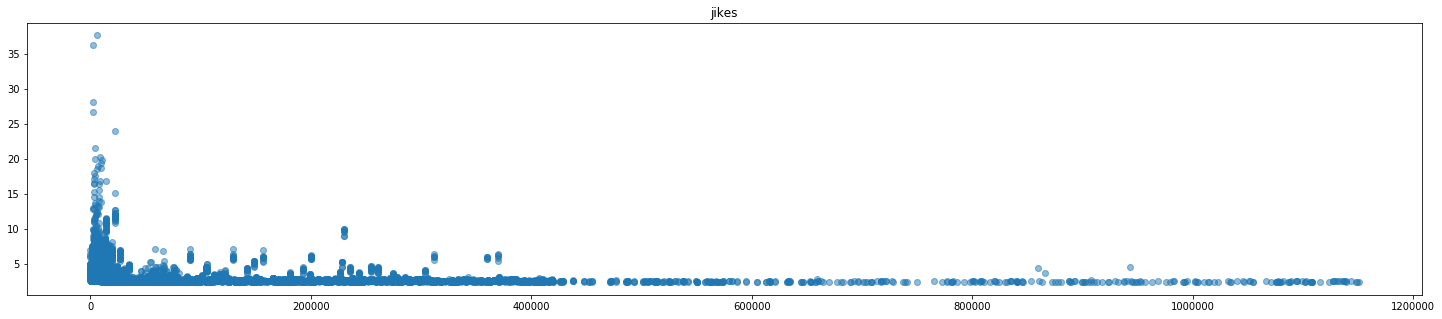

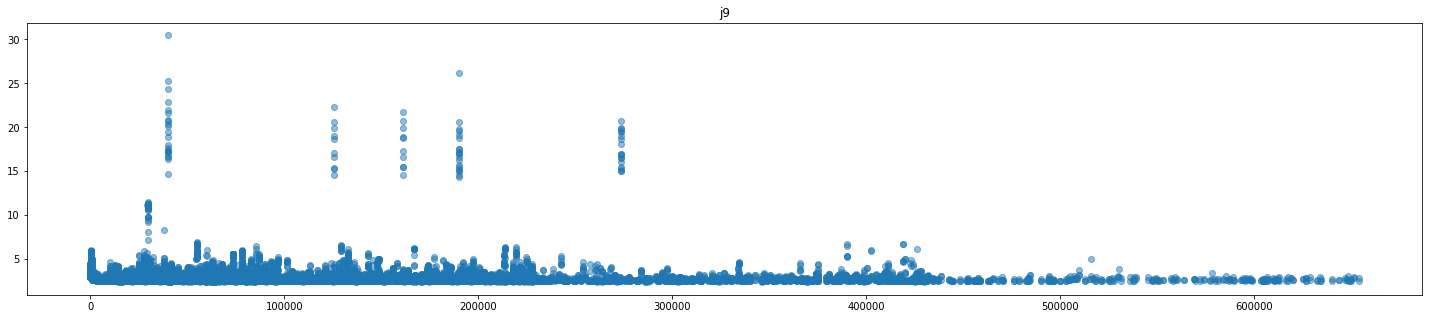

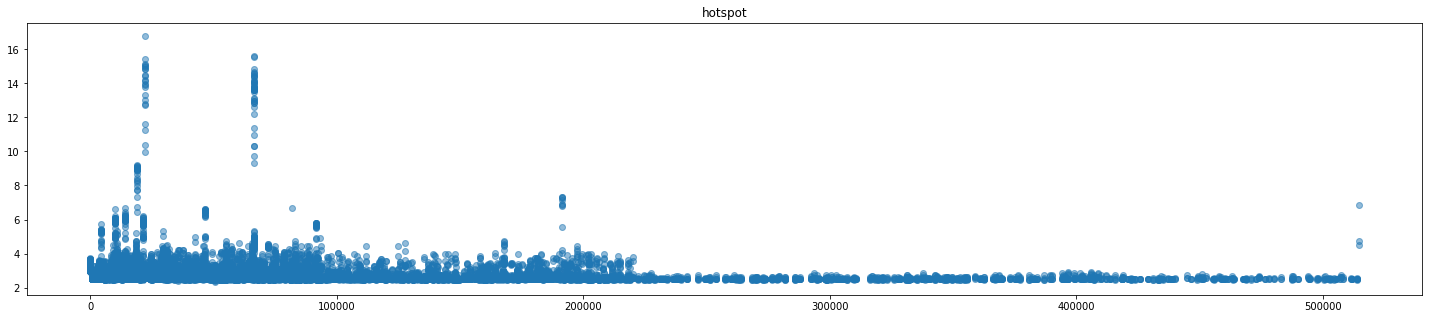

In [15]:
x_list = [ val[0] for val in jikes_data ]
y_list = [ val[1] for val in jikes_data ]

fig= plt.figure(figsize=(25,5))

plt.scatter(x_list, y_list, label="jikes", alpha=0.2)
plt.title("jikes")
plt.show()

fig= plt.figure(figsize=(25,5))

x_list = [ val[0] for val in j9_data ]
y_list = [ val[1] for val in j9_data ]

plt.scatter(x_list, y_list, label="j9", alpha=0.2)
plt.title("j9")
plt.show()

fig= plt.figure(figsize=(25,5))

x_list = [ val[0] for val in hotspot_data ]
y_list = [ val[1] for val in hotspot_data ]

plt.scatter(x_list, y_list, label="hotspot", alpha=0.2)
plt.title("hotspot")
plt.show()

## Individual traces

In [16]:
programs = np.unique(programs)

In [17]:
programs

array(['luindex-default', 'luindex-small', 'lusearch-default',
       'lusearch-small', 'sunflow-default', 'sunflow-small',
       'xalan-default', 'xalan-small'], dtype='<U16')

program: luindex-default


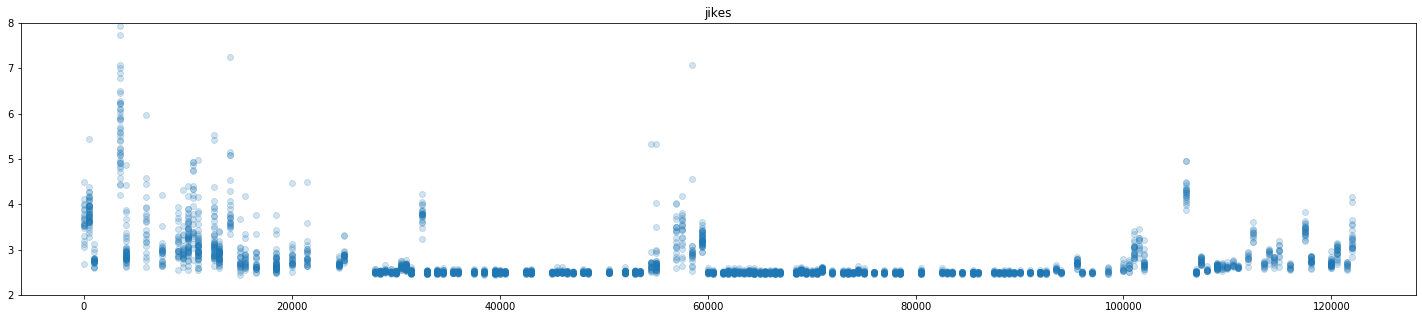

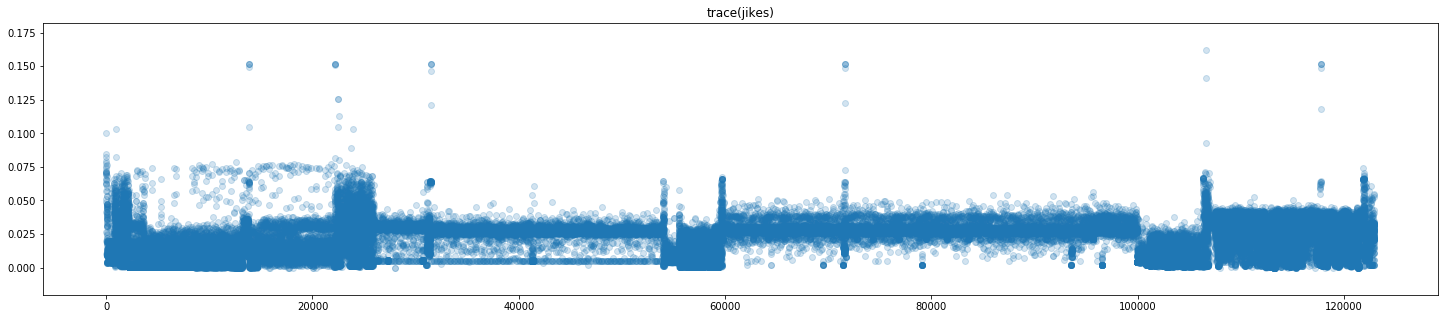

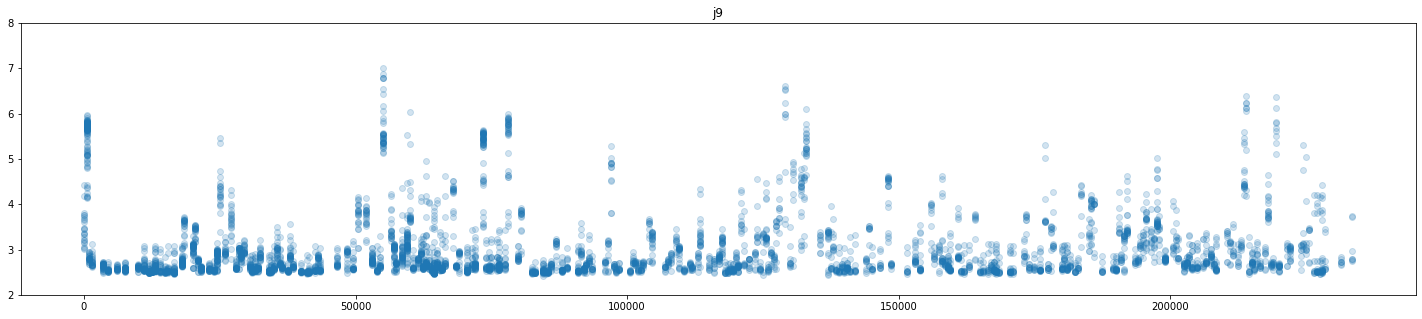

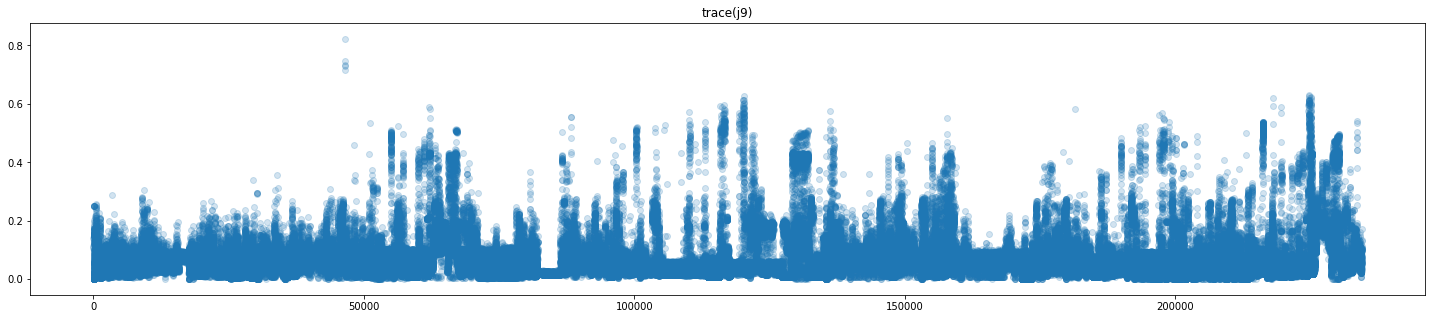

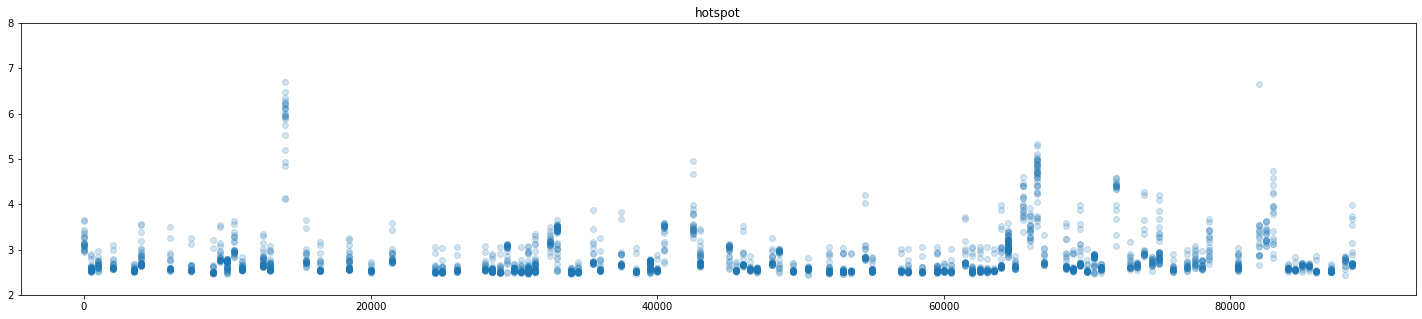

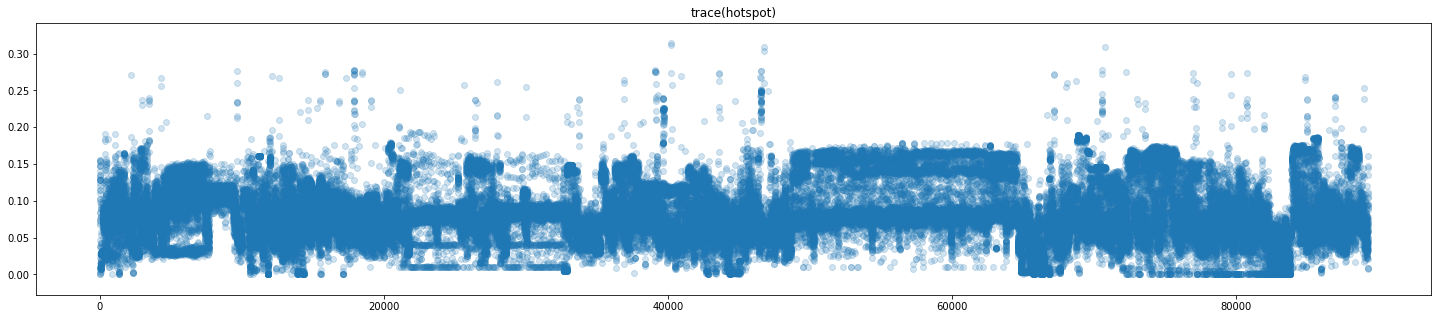

program: luindex-small
program: lusearch-default


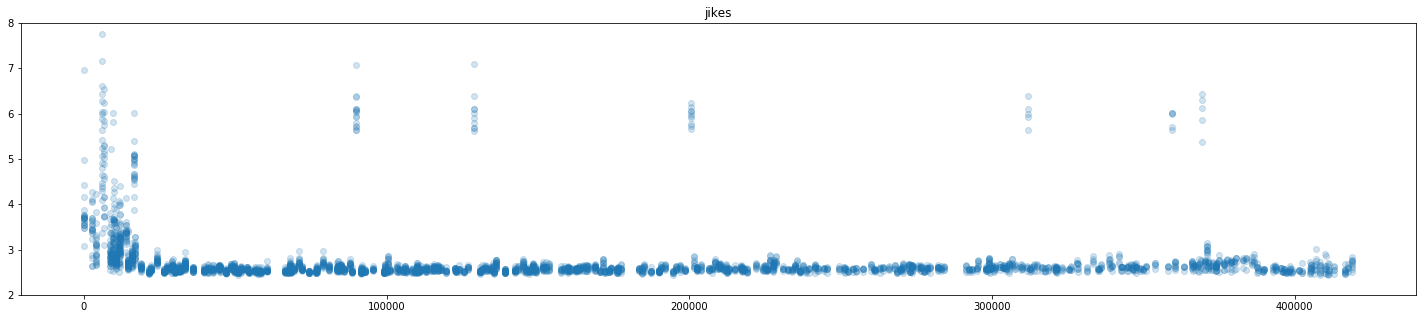

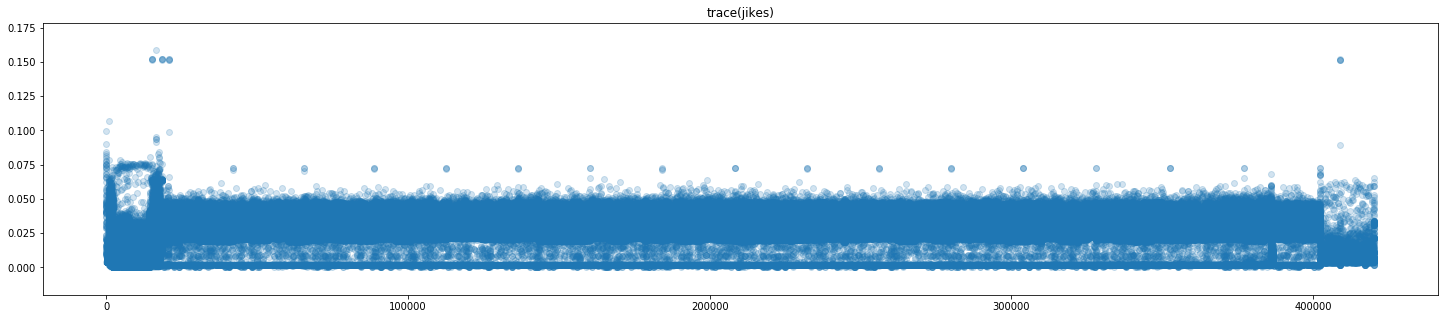

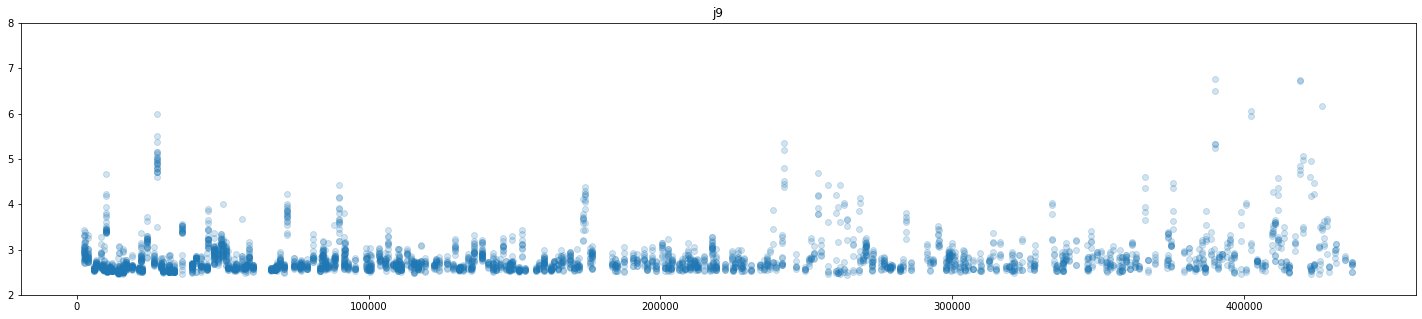

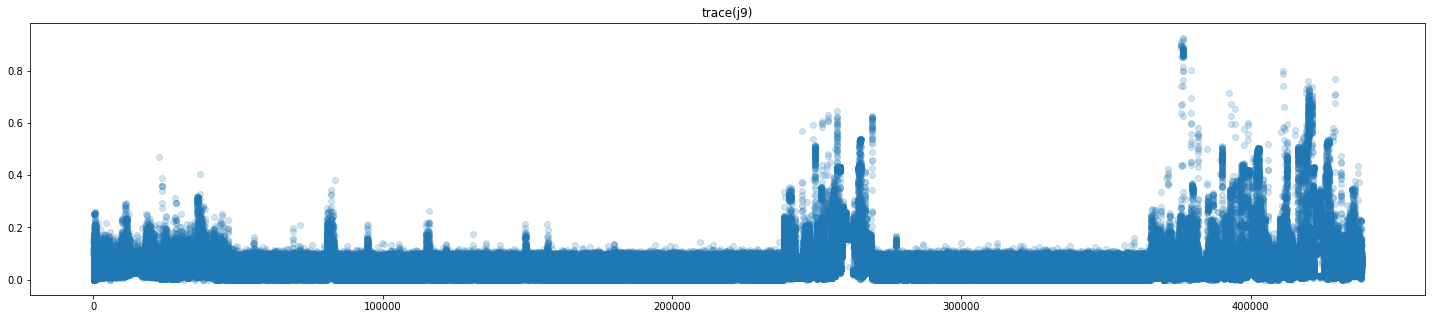

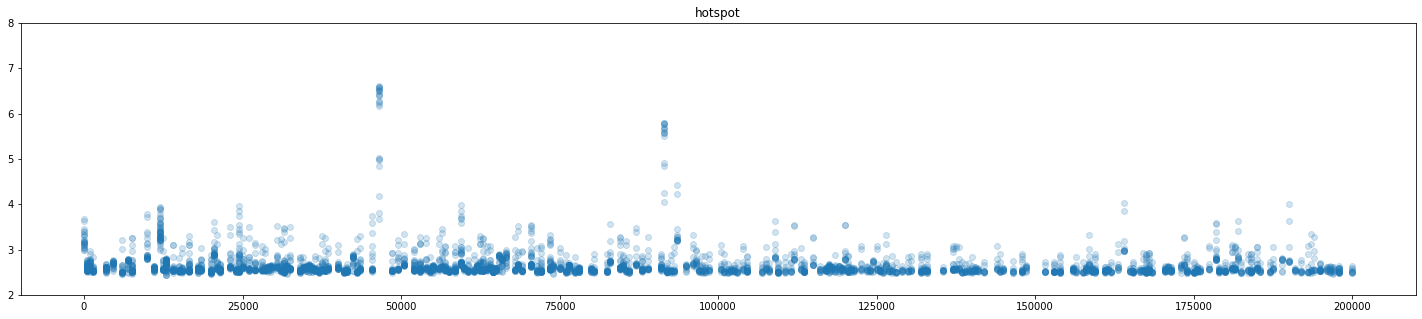

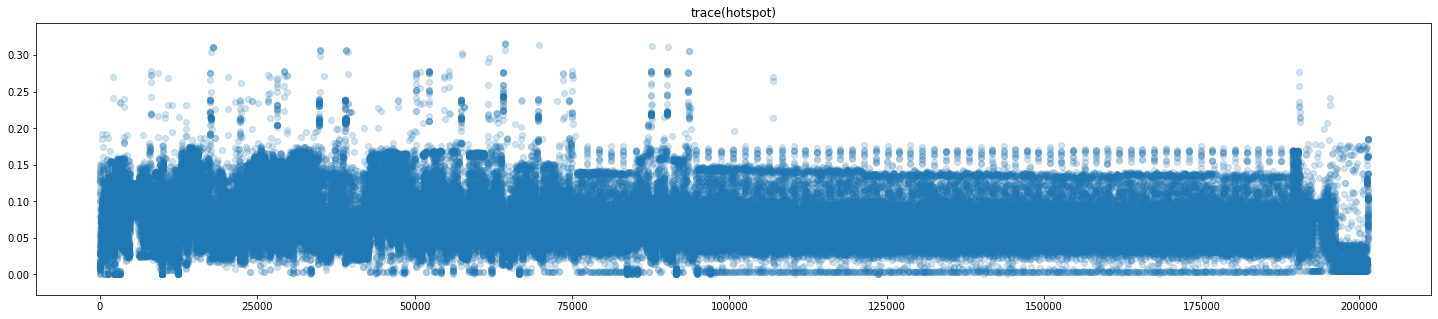

program: lusearch-small


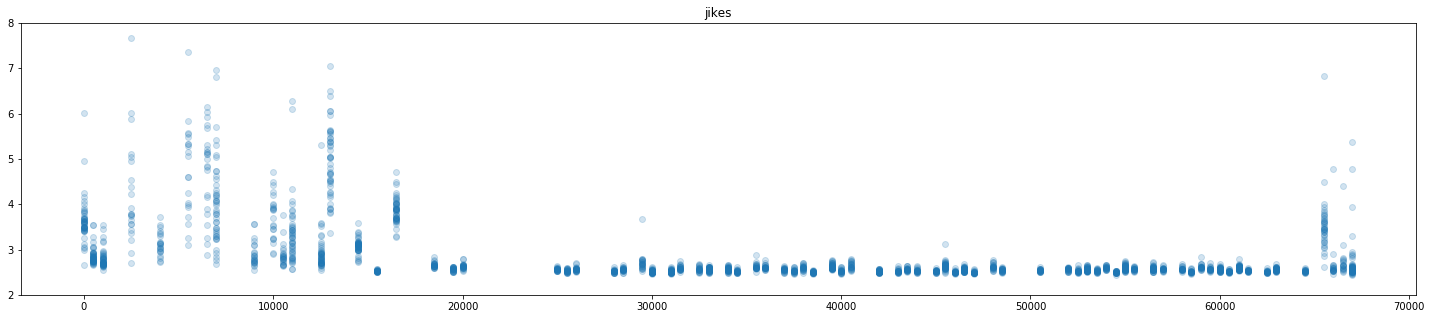

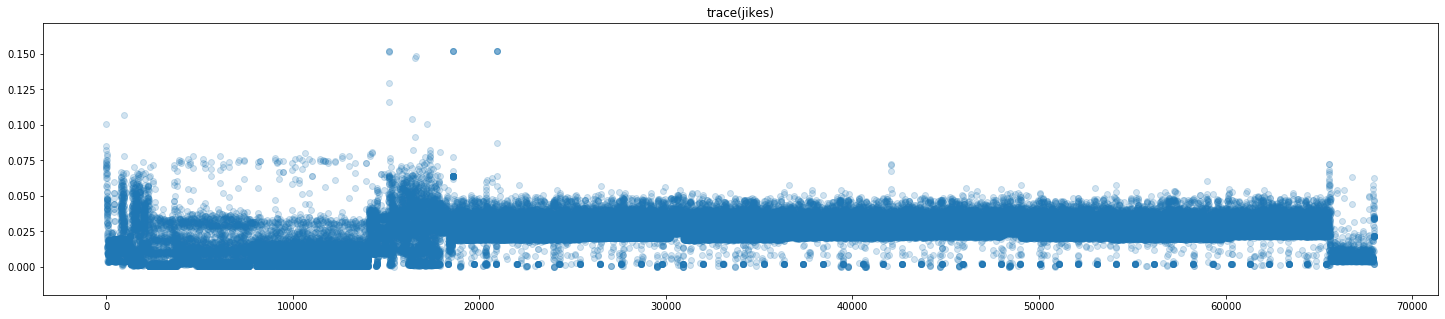

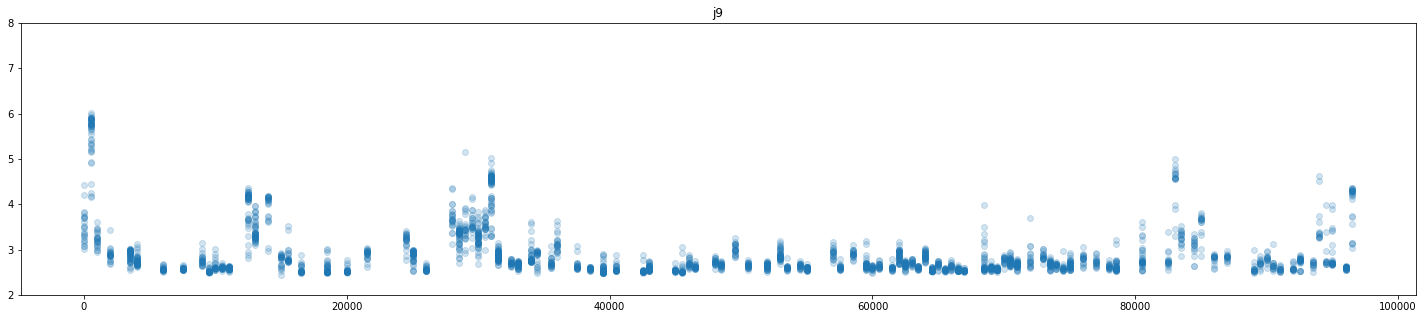

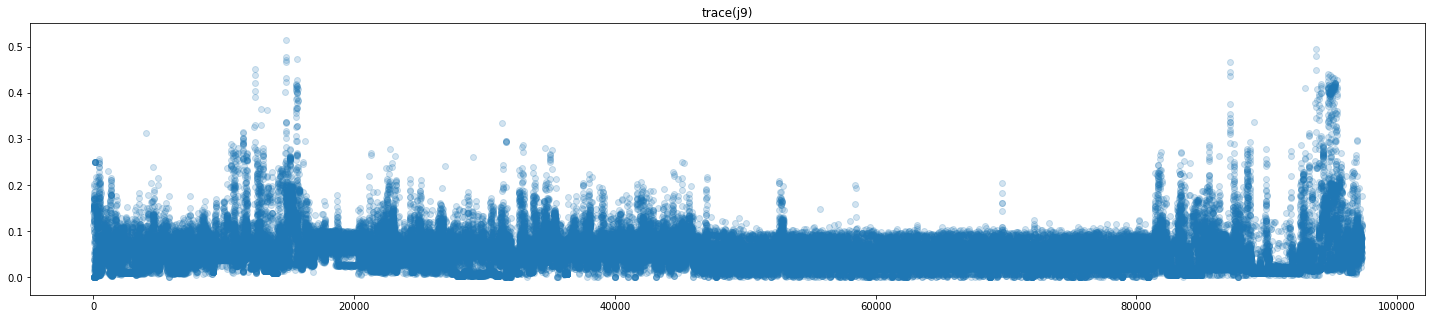

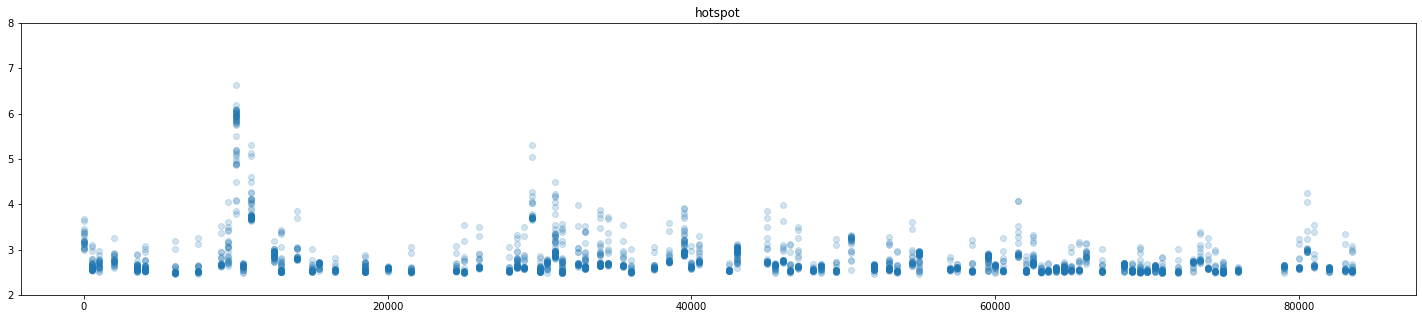

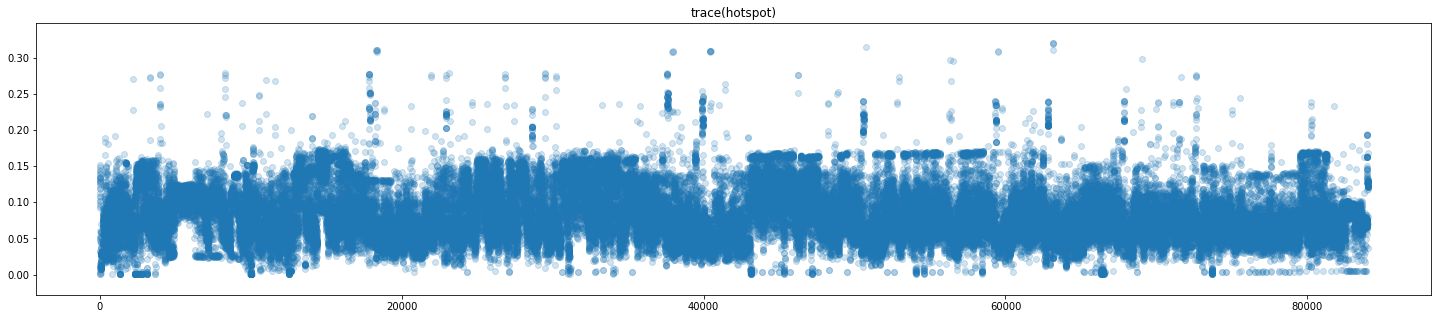

program: sunflow-default


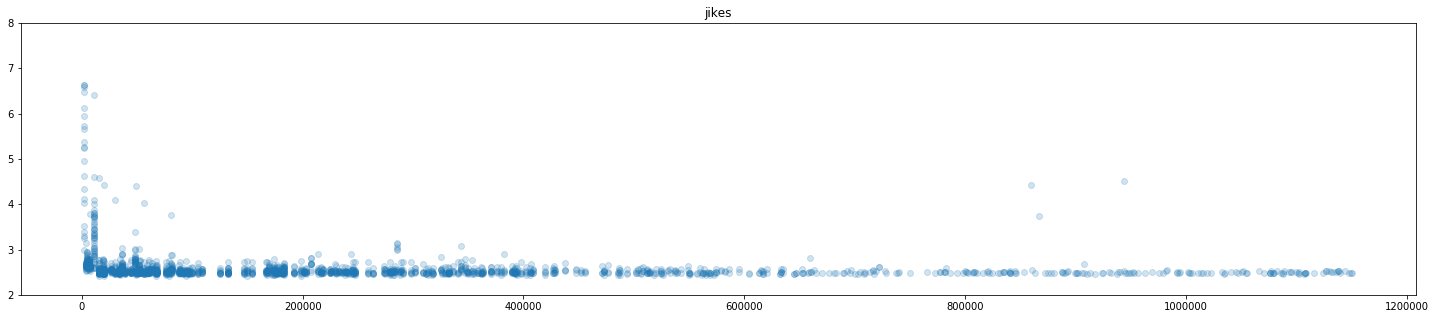

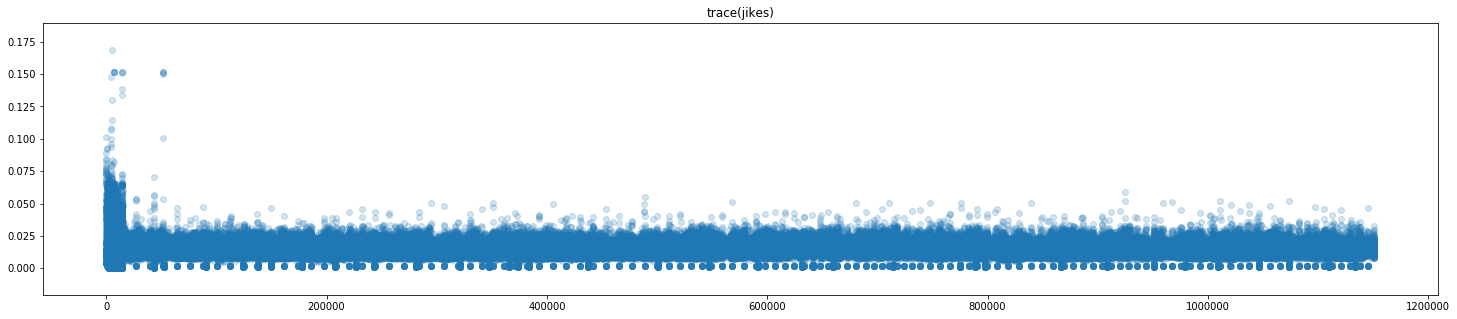

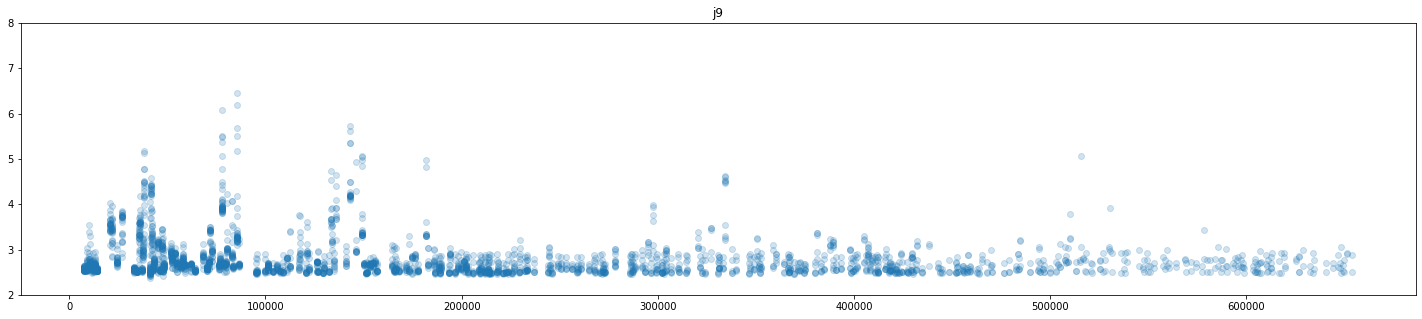

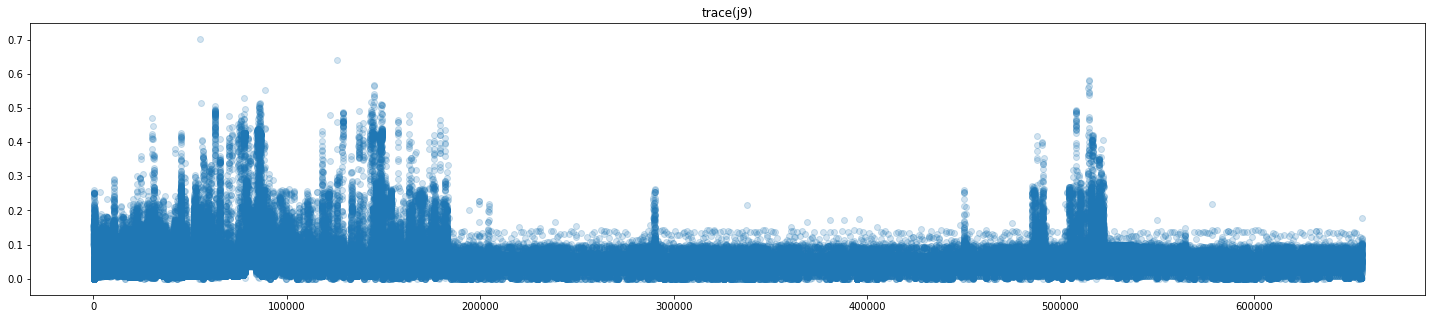

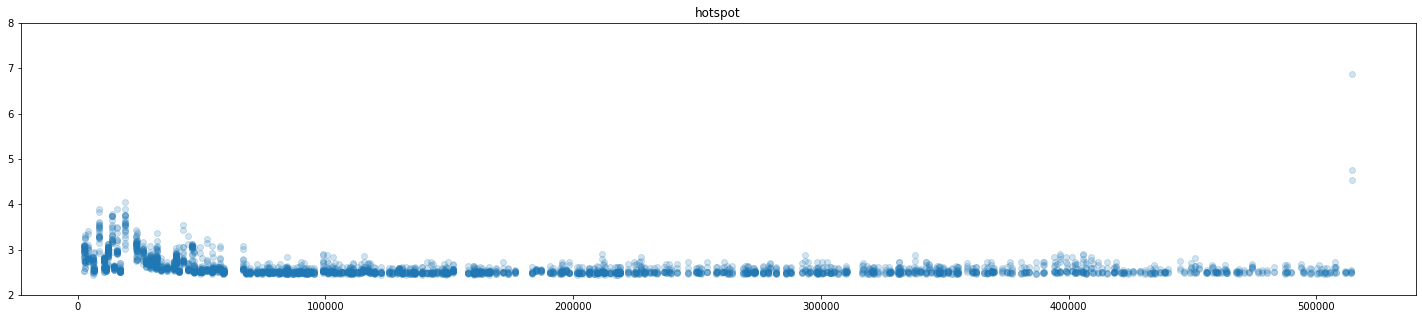

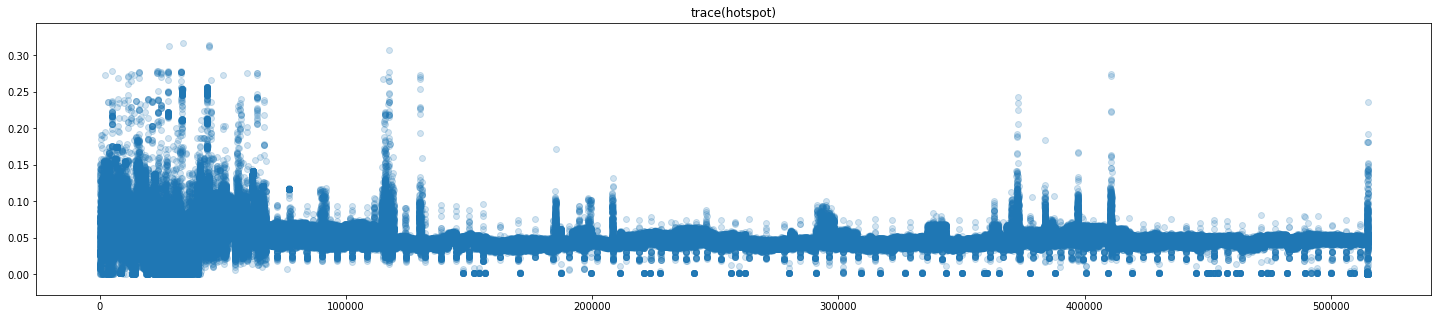

program: sunflow-small


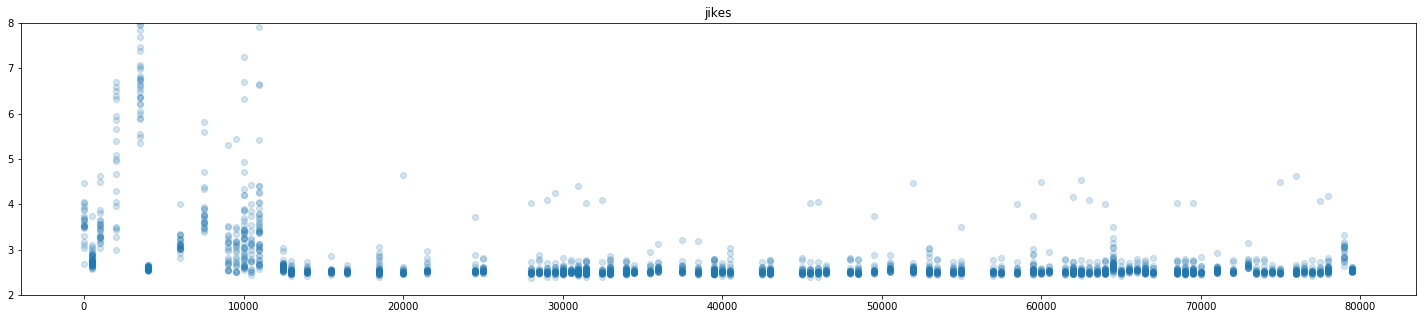

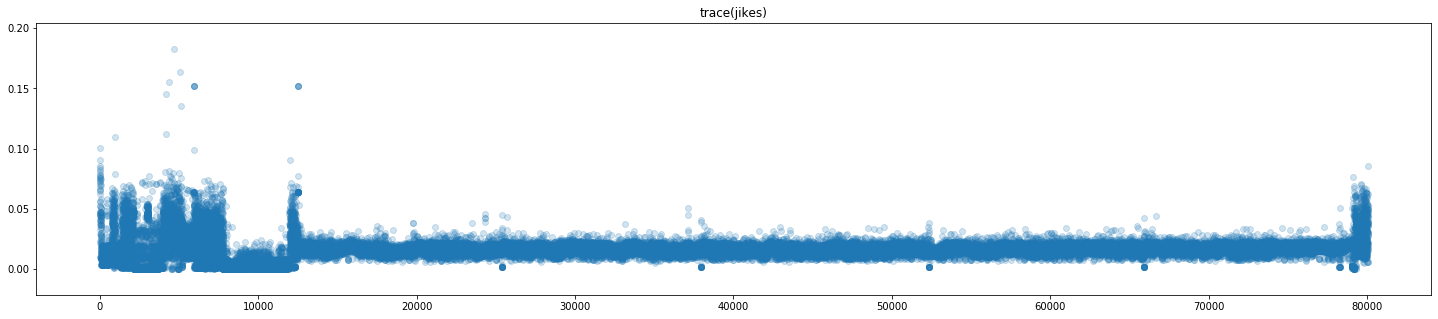

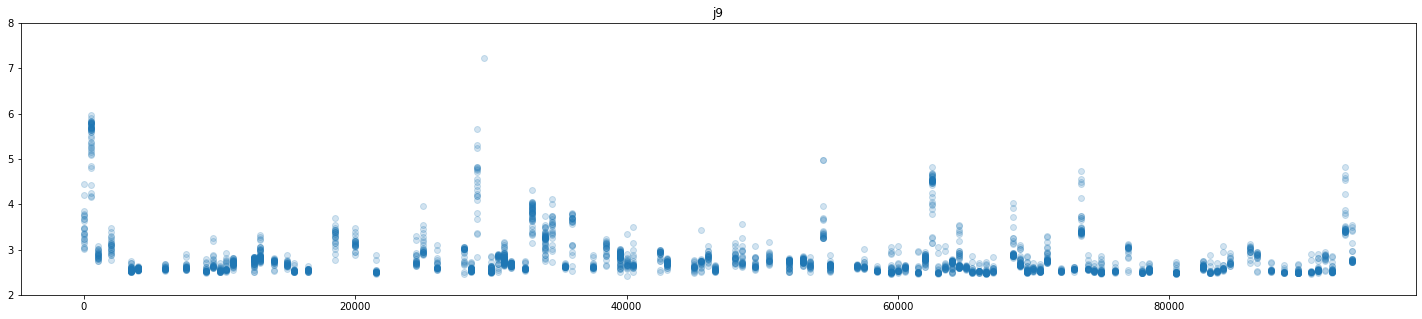

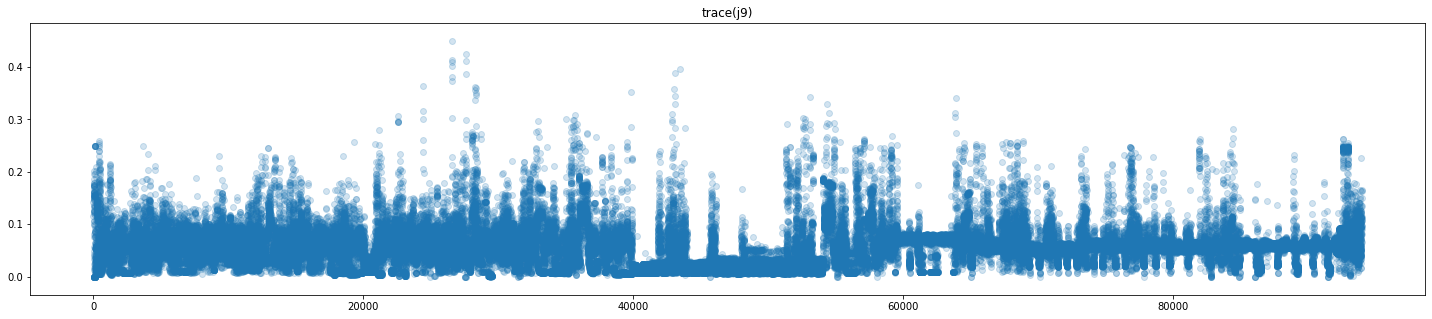

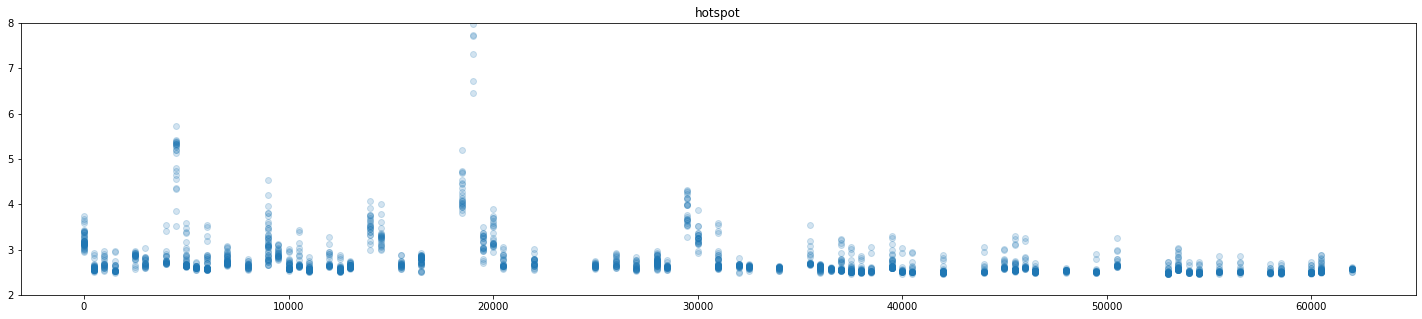

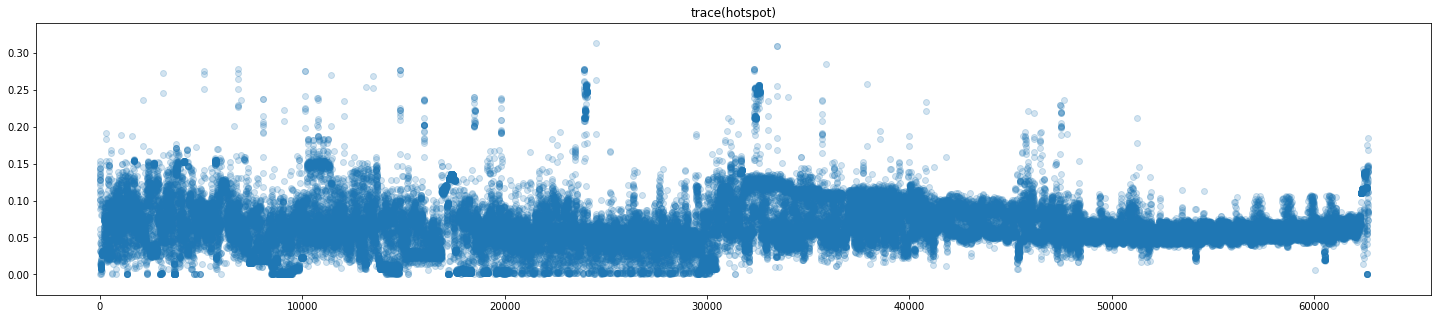

program: xalan-default


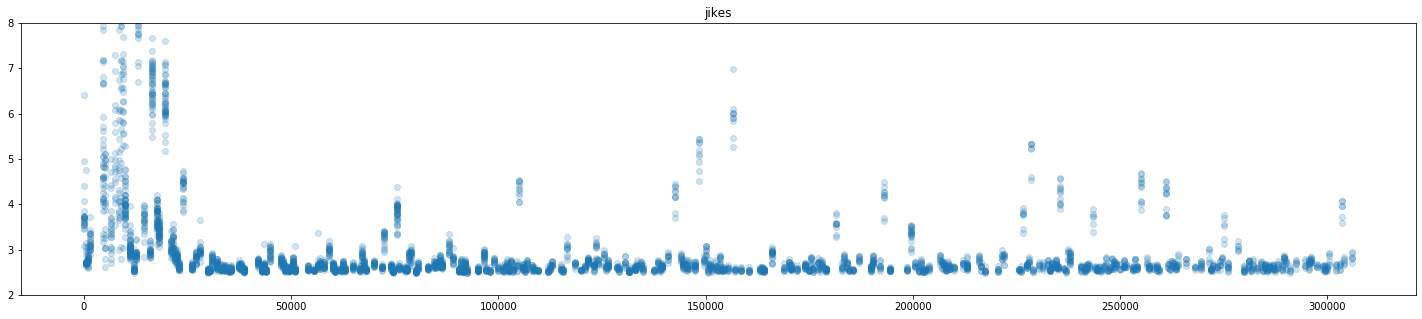

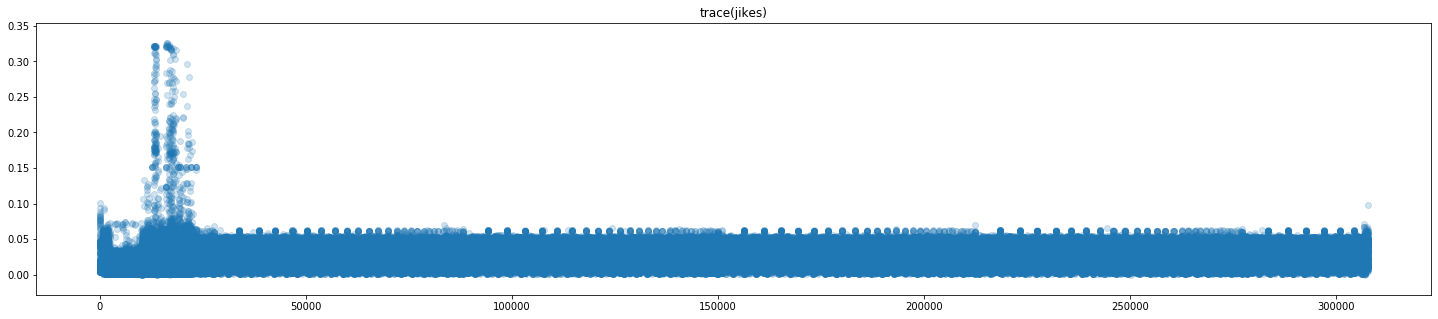

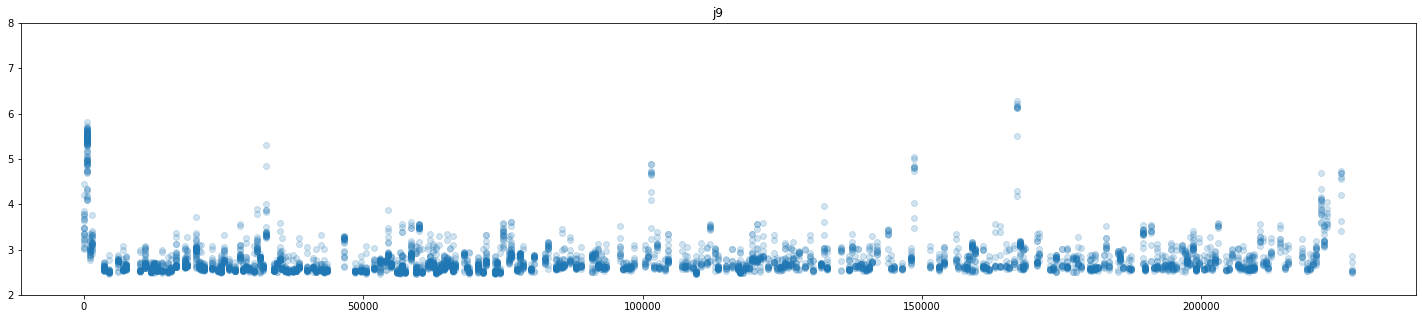

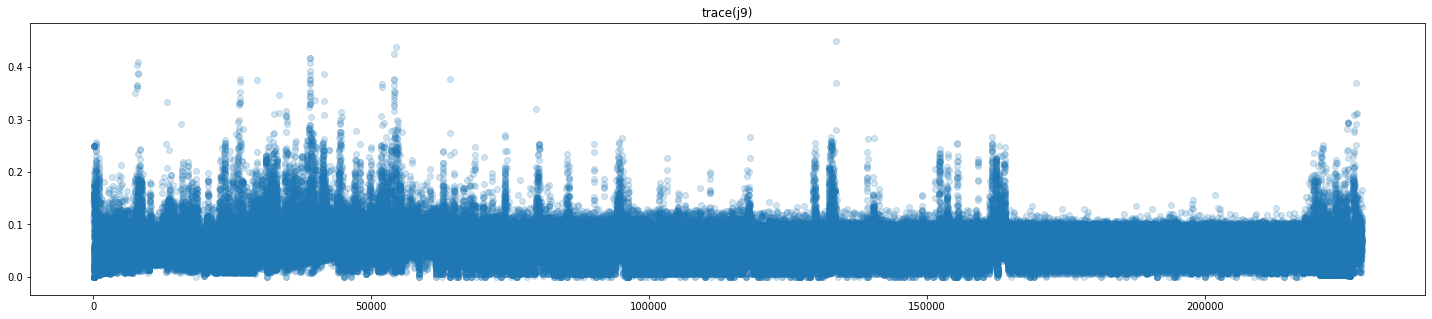

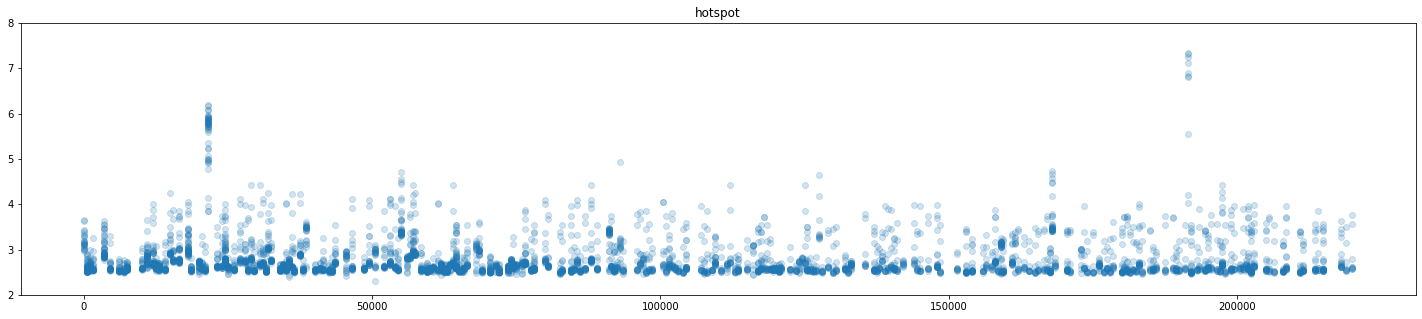

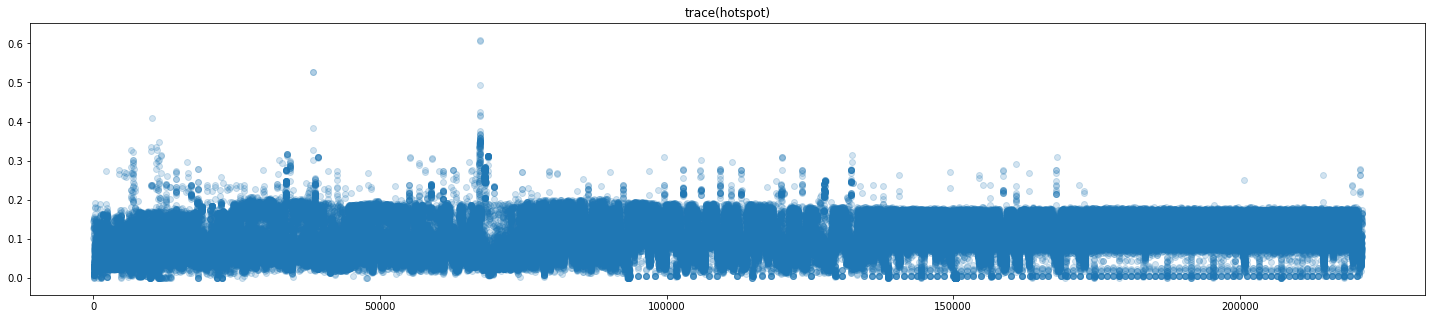

program: xalan-small


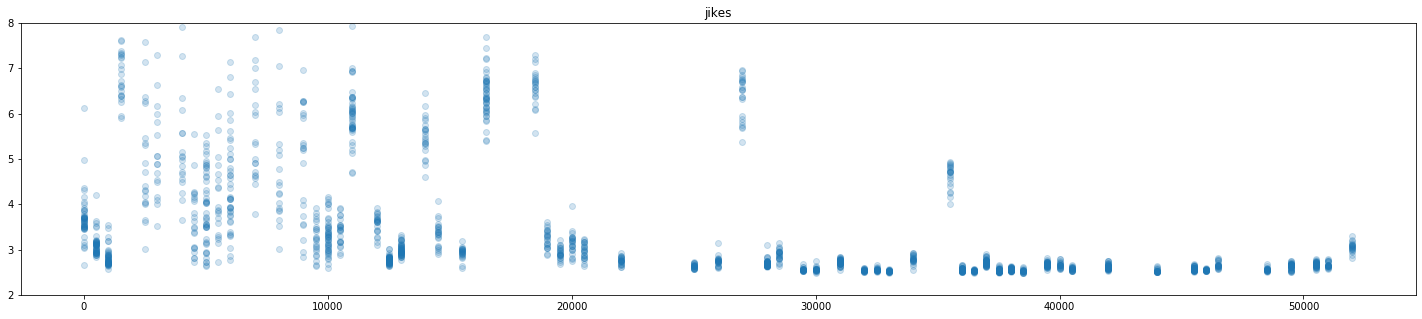

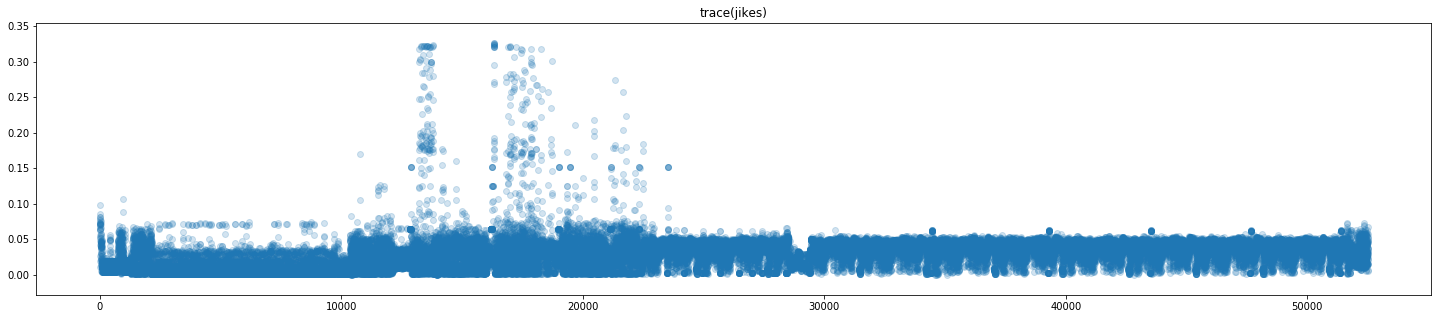

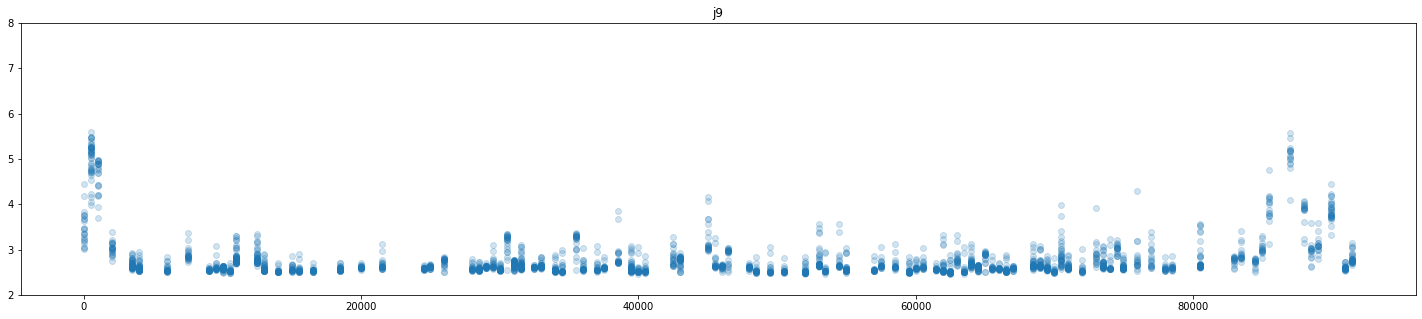

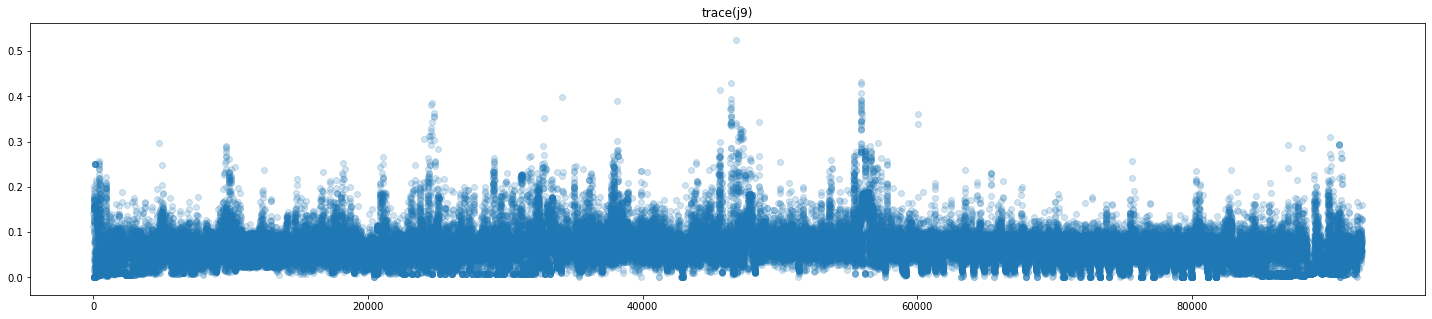

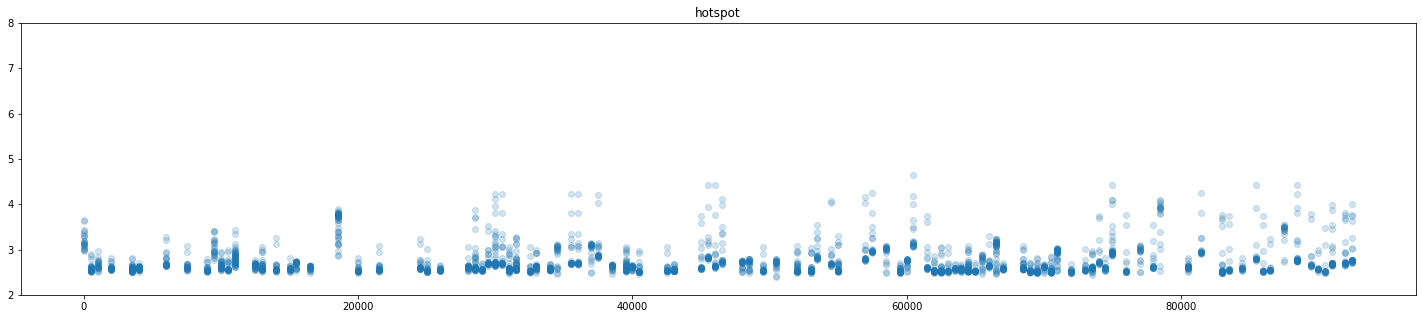

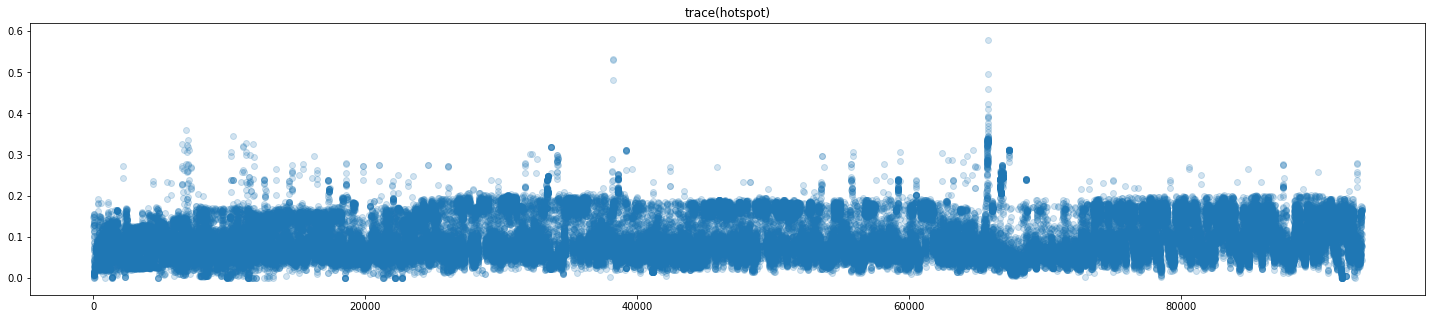

In [20]:
req_programs = programs

exp_dict = {}

variance_data = {
    "variance": [],
    "likelihood": []
}

for program in req_programs:
    print("program: {}".format(program))
    program_list = [ val for val in trace_list if program in val ]
    
    jikes_data = []
    j9_data = []
    hotspot_data = []
    
    exp_dict[program] = {
        "H9J": 0,
        "J9H": 0,
        "9HJ": 0,
        "JH9": 0,
        "HJ9": 0,
        "9JH": 0,
    }
    
    if len(program_list) < 3:
        continue
    
#     print(program_list)
    
    jikes = program+"-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl"
    j9 = program+"-J9-d-l64-p4096-w100000i.analyzed-1.pkl"
    hotspot = program+"-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl"     
    
    trace_jikes = np.loadtxt("test_configs/results/data/"+jikes.split('.')[0]+'.analyzed-1')[:, 8]
    trace_j9 = np.loadtxt("test_configs/results/data/"+j9.split('.')[0]+'.analyzed-1')[:, 8]
    trace_hotspot = np.loadtxt("test_configs/results/data/"+hotspot.split('.')[0]+'.analyzed-1')[:, 8]
    
    train_list = [ key for key in list(result.keys()) if jikes in list(result[key].keys()) ]
    
    for trace_train in train_list:
        for seed in seeds:
            trace_percent = 1.0
            
            # jikes
            key_list = result[trace_train][jikes][seed].keys()
            
            ll_list = []
            
            for key in key_list:
#                 print(trace_length_dict['.'.join(trace_test.split('.')[:2])][0])
                if  not isinstance(key, str):
                    if key < trace_percent * trace_length_dict['.'.join(trace_train.split('.')[:2])][0]:
                        ll_list.append(result[trace_train][jikes][seed][key]['average_loglikelihood'])
                        
                        trace_subset = trace_jikes[key:key+500]
                        variance_data["variance"].append(np.var(trace_subset))
                        variance_data["likelihood"].append(ll_list[-1])
                        
                        jikes_data.append((key, ll_list[-1]))
                        
            
            jikes_ll = np.average(ll_list)
            
            # j9
            key_list = result[trace_train][j9][seed].keys()
            
            ll_list = []
            
            for key in key_list:
                if not isinstance(key, str):
                    if key < trace_percent * trace_length_dict['.'.join(trace_train.split('.')[:2])][0]:
                        ll_list.append(result[trace_train][j9][seed][key]['average_loglikelihood'])
                        
                        trace_subset = trace_j9[key:key+500]
                        variance_data["variance"].append(np.var(trace_subset))
                        variance_data["likelihood"].append(ll_list[-1])
                        
                        j9_data.append((key, ll_list[-1]))
            
            j9_ll = np.average(ll_list)
            
            # hotspot
            key_list = result[trace_train][hotspot][seed].keys()
            
            ll_list = []
            
            for key in key_list:
                if  not isinstance(key, str):
                    if key < trace_percent * trace_length_dict['.'.join(trace_train.split('.')[:2])][0]:
                        ll_list.append(result[trace_train][hotspot][seed][key]['average_loglikelihood'])
                        
                        trace_subset = trace_hotspot[key:key+500]
                        variance_data["variance"].append(np.var(trace_subset))
                        variance_data["likelihood"].append(ll_list[-1])
                        
                        hotspot_data.append((key, ll_list[-1]))
            
            hotspot_ll = np.average(ll_list)
        
            if hotspot_ll > j9_ll and j9_ll > jikes_ll:
                exp_dict[program]["H9J"] += 1
            elif jikes_ll > j9_ll and j9_ll > hotspot_ll:
                exp_dict[program]["J9H"] += 1
            elif j9_ll > hotspot_ll and hotspot_ll > jikes_ll:
                exp_dict[program]["9HJ"] += 1
            elif jikes_ll > hotspot_ll and hotspot_ll > j9_ll:
                exp_dict[program]["JH9"] += 1
            elif hotspot_ll > jikes_ll and jikes_ll > j9_ll:
                exp_dict[program]["HJ9"] += 1
            elif j9_ll > jikes_ll and jikes_ll > hotspot_ll:
                exp_dict[program]["9JH"] += 1
    
    ############################## Jikes
    
    x_list = [ val[0] for val in jikes_data ]
    y_list = [ val[1] for val in jikes_data ]

    fig= plt.figure(figsize=(25,5))

    plt.scatter(x_list, y_list, label="jikes", alpha=0.2)
    plt.title("jikes")
#     plt.xlim(0, 8)
    plt.ylim(2, 8)
    plt.show()
    
    #### plot jikes trace
    
    # load trace
#     t = np.loadtxt("test_configs/results/data/"+jikes.split('.')[0]+'.analyzed-1')[:, 8]
#     print(t[:5])
    fig= plt.figure(figsize=(25,5))

    plt.scatter(np.arange(trace_jikes.shape[0]), trace_jikes, label="jikes", alpha=0.2)
    plt.title("trace(jikes)")
#     plt.xlim(0, 8)
#     plt.ylim(2, 8)
    plt.show()

    ############################## J9
    
    fig= plt.figure(figsize=(25,5))

    x_list = [ val[0] for val in j9_data ]
    y_list = [ val[1] for val in j9_data ]

    plt.scatter(x_list, y_list, label="j9", alpha=0.2)
    plt.title("j9")
    plt.ylim(2, 8)
    plt.show()

    #### plot j9 trace
    
    # load trace
    t = np.loadtxt("test_configs/results/data/"+j9.split('.')[0]+'.analyzed-1')[:, 8]
#     print(t[:5])
    fig= plt.figure(figsize=(25,5))

    plt.scatter(np.arange(trace_j9.shape[0]), trace_j9, label="j9", alpha=0.2)
    plt.title("trace(j9)")
#     plt.xlim(0, 8)
#     plt.ylim(2, 8)
    plt.show()
    
    ############################## Hotspot
    
    fig= plt.figure(figsize=(25,5))

    x_list = [ val[0] for val in hotspot_data ]
    y_list = [ val[1] for val in hotspot_data ]

    plt.scatter(x_list, y_list, label="hotspot", alpha=0.2)
    plt.title("hotspot")
    plt.ylim(2, 8)
    plt.show()
    
    #### plot hotspot trace
    
    # load trace
#     t = np.loadtxt("test_configs/results/data/"+hotspot.split('.')[0]+'.analyzed-1')[:, 8]
#     print(t[:5])
    fig= plt.figure(figsize=(25,5))

    plt.scatter(np.arange(trace_hotspot.shape[0]), trace_hotspot, label="hotspot", alpha=0.2)
    plt.title("trace(hotspot)")
#     plt.xlim(0, 8)
#     plt.ylim(2, 8)
    plt.show()
    
#     break

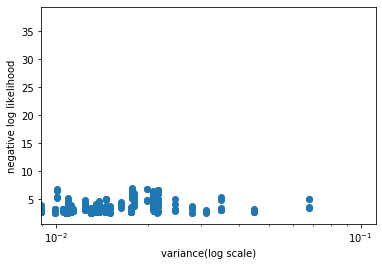

In [29]:
plt.scatter(variance_data["variance"], variance_data["likelihood"])
plt.xlabel("variance(log scale)")
plt.ylabel("negative log likelihood")
plt.xscale("log")
plt.savefig("test_configs/plots/variance_correlation.png")
# plt.show()

In [33]:
stat_values = stats.pearsonr(variance_data["variance"], variance_data["likelihood"])
print("pearson correlation coefficient: ", stat_values[0])

pearson correlation coefficient:  0.10174572289787524


In [34]:
stat_values = stats.spearmanr(variance_data["variance"], variance_data["likelihood"])
print("spearman correlation coefficient: ", stat_values[0])

spearman correlation coefficient:  0.3984387510569854
